<a target="_blank" href="https://colab.research.google.com/github/taobrienlbl/advanced_earth_science_data_analysis/blob/spring_2023_iub/lessons/05_multidimensional_arrays_also_plotting/05_warmup.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# WARMUP | Lesson 05

**Goal**: Plot a timeseries of the annual average number of magnitude 6 (or larger) earthquakes.

In this warmup, you will demonstrate your proficiency in using `pandas` and `matplotlib` for scientific data analysis in a Jupyter notebook.  I am intentionally not providing much guidance in this exercise, leaving it to you to determine the best path to the goal.  That said, I do have some specific instructions:

* download [this CSV](https://raw.githubusercontent.com/taobrienlbl/advanced_earth_science_data_analysis/spring_2023_iub/lessons/05_multidimensional_arrays_also_plotting/data/usgs_major_earthquakes_1900-2023.csv) file containing a dataset of all earthquakes greater than magnitude 6 that USGS has on record since 1900
* utilize Markdown cells extensively to document your thought process, including notes about the CSV file, its origin, etc.
* comment your code extensively
* use git to stage/commit/push this notebook to your course github repository once done (in a lesson 04 folder)
* bonus: if you still have time, also make a plot of # of earthquakes vs month (the seasonal cycle, if there is one)

A note about the CSV file: I obtained it from [a USGS query for magnitude 6 or larger earthquakes globally since 1900](https://earthquake.usgs.gov/earthquakes/map/?extent=-88.71618,-248.20313&extent=88.70033,336.79688&range=search&timeZone=utc&search=%7B%22name%22:%22Search%20Results%22,%22params%22:%7B%22starttime%22:%221900-01-01%2000:00:00%22,%22endtime%22:%222023-09-22%2023:59:59%22,%22minmagnitude%22:6,%22orderby%22:%22time%22%7D%7D) on Friday September 22, 2023 at 10:20am Eastern.  Though USGS ultimately was the source of the data, my search originated from an [NCEI website](https://www.ngdc.noaa.gov/hazel/view/hazards/earthquake/search).  (See the markdown source of this cell for the specific URLs; the USGS query URL contains the specific query parameters.)

I used the CSV download option provided on the website, and the file was downloaded as `query.csv`; I renamed the file to `usgs_major_earthquakes_1900-2023.csv`.

When I download data like this from a web source, I'll often put it in a `data` folder somewhere and will place a `README` (or `README.md`) file in the `data` directory to give information about where I downloaded the data from and any citations that the data provider requests that I use.  I do this because I often come back to datasets like this later on and it isn't always straightforward to find this information after the fact.

# Solution

The file `usgs_major_earthquakes_1900-2023.csv` was obtained from [a USGS query for magnitude 6 or larger earthquakes globally since 1900](https://earthquake.usgs.gov/earthquakes/map/?extent=-88.71618,-248.20313&extent=88.70033,336.79688&range=search&timeZone=utc&search=%7B%22name%22:%22Search%20Results%22,%22params%22:%7B%22starttime%22:%221900-01-01%2000:00:00%22,%22endtime%22:%222023-09-22%2023:59:59%22,%22minmagnitude%22:6,%22orderby%22:%22time%22%7D%7D) on Friday September 22, 2023 at 10:20am Eastern.  Though USGS ultimately was the source of the data, my search originated from an [NCEI website](https://www.ngdc.noaa.gov/hazel/view/hazards/earthquake/search).  (See the markdown source of this file for the specific URLs; the USGS query URL contains the specific query parameters.)

I used the CSV download option provided on the website, and the file was downloaded as `query.csv`; I renamed the file to `usgs_major_earthquakes_1900-2023.csv`.

[The website](https://www.ngdc.noaa.gov/hazel/view/hazards/earthquake/search) indicates the data should be cited as follows:

```
Please cite as:
National Geophysical Data Center / World Data Service (NGDC/WDS): NCEI/WDS Global Significant Earthquake Database. NOAA National Centers for Environmental Information. doi:10.7289/V5TD9V7K
```

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('usgs_major_earthquakes_1900-2023.csv',skiprows=1 , names=['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst', 'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type', 'horizontalError', 'depthError', 'magError', 'magNst', 'status', 'locationSource', 'magSource'])
date = pd.to_datetime(data['time'])

Text(0, 0.5, 'Magnitude')

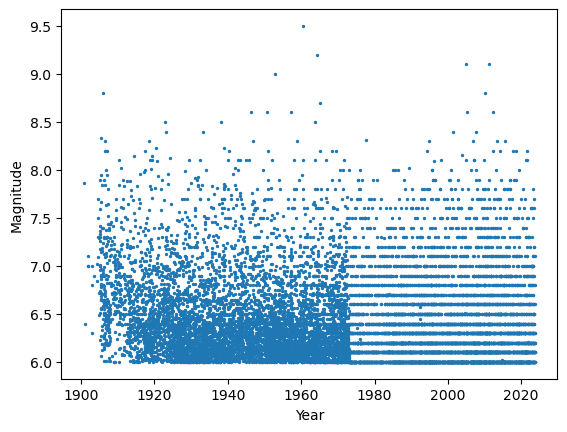

In [63]:
plt.scatter(date,data['mag'], s=2)
plt.xlabel('Year')
plt.ylabel('Magnitude')

In [64]:
# group by year
year = pd.to_datetime(data['time']).dt.year
data_group = data.groupby(year)
times = data_group['time'].count()
times
mag = data_group['mag'].mean()

Text(0, 0.5, 'Magnitude')

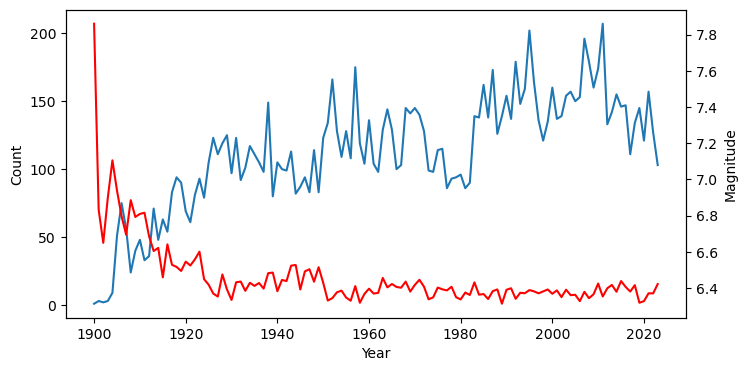

In [65]:
fig, ax1 = plt.subplots(figsize=(8, 4))
ax2 = ax1.twinx()

ax1.plot(times)
ax2.plot(mag,color='red')
ax1.set_xlabel('Year')
ax1.set_ylabel('Count')
ax2.set_ylabel('Magnitude')

In [66]:
# group by month
month = pd.to_datetime(data['time']).dt.month
data_group_m = data.groupby(month)
times_m = data_group_m['time'].count()
mag_m = data_group_m['mag'].mean()

/var/folders/qk/d2qw5j9x1h3cmpy31fr930ym0000gt/T/ipykernel_22810/3486486785.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


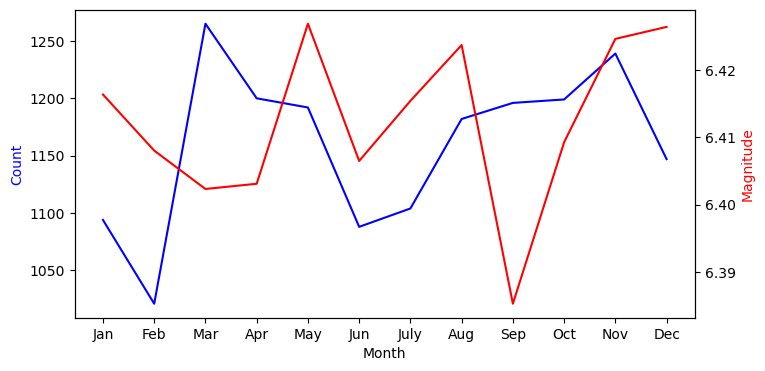

In [67]:
fig, ax1 = plt.subplots(figsize=(8, 4))
ax2 = ax1.twinx()

ax1.plot(times_m,color='blue')
ax2.plot(mag_m,color='red')
ax1.set_xlabel('Month')
ax1.set_ylabel('Count', color='blue')
ax2.set_ylabel('Magnitude', color='red')
ax1.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec'])

fig.show()